____

**Exercício 1**

Utilizando a mesma estratégia desenvolvida no exemplo, faça uma análise comparativa dos agrupamentos de clientes do banco (dataset *german_credit_data.csv*) separando-os em 3 e 5 agrupamentos. Quais são as variáveis que mais apresentação distinções em cada caso?

___

### 1 - Importações

In [15]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# ignorar warnings
warnings.filterwarnings('ignore')

### 2 - Tratamento Inicial dos Dados

In [16]:
# importar os dados
data = pd.read_csv('../data/german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [17]:
# eliminando colunas não utilizadas
data.drop(['Unnamed: 0'], inplace=True, axis=1)

# transformar a coluna Job em texto
data.Job = data.Job.apply(lambda x: str(x))

In [18]:
# checar os tipos de variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [19]:
# transformar o risco em números
data.Risk = data.Risk.map({'good': 0, 'bad': 1})

# separar entre preditores (x) e targets (y)
x = data.drop(['Risk'], axis=1)
y = data[['Risk']]



### 3 - Funções de apoio à modelagem

In [20]:
def process_model (df_x, n_clusters):
    
    # selecionar (inicialmente) apenas as variáveis numéricas
    num_features= df_x.select_dtypes(include=np.number).columns.tolist()

    # configurando um pipeline de processamento de dados
    pipe_num  = Pipeline([('input_na', SimpleImputer(strategy='mean'))])
    
    # configurar o transformador de colunas
    pre_processador = ColumnTransformer([('transf_num', pipe_num, num_features)], remainder='drop')

    # configurar um pipeline de modelagem
    final_pipe = Pipeline([
        ('pre_processador', pre_processador),
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=2))
    ])

    # ajustar o modelo
    final_pipe.fit(df_x)
    
    # atribuir clusters aos pontos
    df_x['cluster'] = final_pipe.predict(df_x)

    # checando a distribuição dos clusters
    print('')
    print('Distribuição por Cluster (em %):')
    
    print(round(df_x.cluster.value_counts(normalize=True)*100,0))
    
    return df_x

In [21]:
def show_graph (df_graph):
    
    plt.figure(figsize=(8, 8))
    sns.pairplot(df_graph, hue='cluster', palette='Set2')
    plt.show()

In [22]:
def calc_metrics(y, data):
    # analisando-se métricas
    print('')    
    print('Métricas:')
    print(f'--> Homogeneidade: {round(homogeneity_score(y.values.reshape(-1), data["cluster"]), 4)}')
    print(f'--> Complitude: {round(completeness_score(y.values.reshape(-1), data["cluster"]), 4)}')
    print(f'--> V_score: {round(v_measure_score(y.values.reshape(-1), data["cluster"]), 4)}')
    
    
    # agrupando estatísticas por cluster
    print('')
    print('')
    print('Estatísticas por Cluster:')
    print(round(data.groupby("cluster").mean(), 2))

In [23]:
def run_analysis(df, df_x, y, n_clusters):
    df_processed =  process_model (df_x, n_clusters)
    df["cluster"] = df_processed["cluster"]
    show_graph(df)
    calc_metrics(y, df)

    

### 4 - Observação sobre as conclusões

As análises foram feitas comparando-se os resultados da simulação para n_clusters com valores diferentes. A simulação com n_clusters = 2 foi apresentada pelo instrutor durante a aula.
<br>
<br> Como as labels de cada cluster são geradas automaticamente, não se pode fazer a comparação por seu nome quando se analisa uma simulação em relação à outra.
<br>Ou seja, o cluster "0" da análise com n_clusters=2 não necessariamente corresponde ao cluster "0" da análise com n_clusters=3.
<br>Sendo assim, para facilitar a explicação, foi gerado um quadro resumo, onde podemos observar a possível equivalência entre as labels de cada simulação variando o número de clusters (parâmetro n_clusters).
<br>No primeiro quadro (para n_clusters=3), por exemplo, podemos observar que os clusters com label "0" e "1" da simulação com n_clusters=3 possivelmente mantém uma relação original com o cluster de label "1" da simulação com n_clusters=2.
<br>
<br>Também para facilitar a identificação de cada label entre simulações diferentes, quando necessário, será adotada a nomenclatura abaixo:
<br><ul>N.L, onde N é o número do cluster e L é o número da label. Ex.: 2.1 refere-se à label 1 da simulação com n_cluster = 2.</ul>

### 5 - Processamento das simulações variando o número de clusters

#### 5.1 - Processamento com 3 clusters


Distribuição por Cluster (em %):
0    59.0
1    22.0
2    19.0
Name: cluster, dtype: float64


<Figure size 576x576 with 0 Axes>

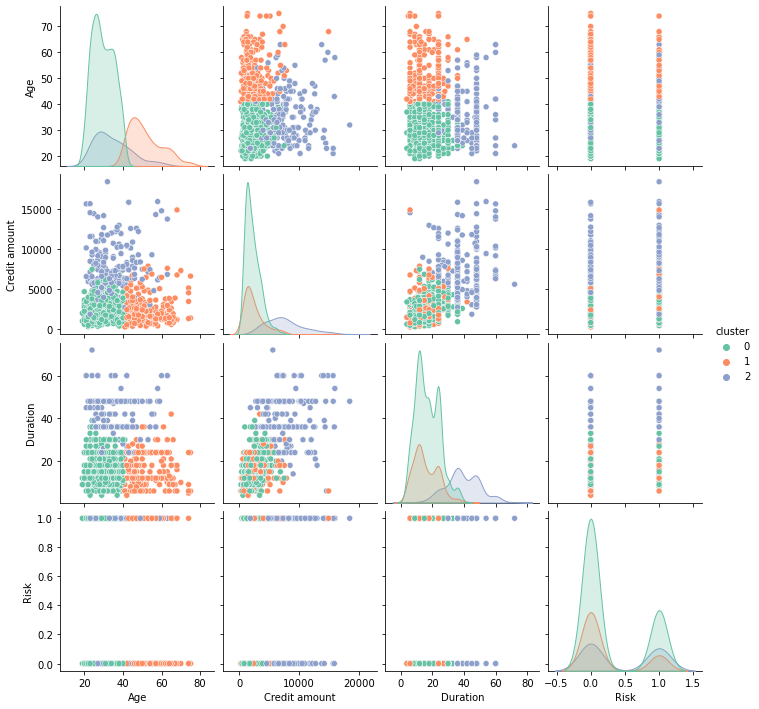


Métricas:
--> Homogeneidade: 0.0242
--> Complitude: 0.0153
--> V_score: 0.0187


Estatísticas por Cluster:
           Age  Credit amount  Duration  Risk
cluster                                      
0        29.66        2205.51     16.88  0.28
1        51.65        2398.47     15.85  0.21
2        34.72        7587.21     39.26  0.45


In [24]:
n_clusters = 3
run_analysis (data.copy(), x.copy(), y.copy(), n_clusters)

<br>No quadro abaixo, a análise foi feita a partir dos gráficos gerados e dos atributos Credit Amount, Duration e Age.
<br>Percebemos que, ao aumentar o número de clusters de 2 para 3, o algoritmo agora considerou o atributo Age para segregar os dados, além dos outros dois atributos que já estavam sendo utilizados.

<table>
    <tr>
        <td colspan="4" style="text-align: center">n_clusters = 2</td>
        <td colspan="4" style="text-align: center">n_clusters = 3</td>
    </tr>
    <tr>
        <td>Label</td>
        <td>Possível descrição</td>
        <td>Distribuição (%)</td>
        <td>Possível segregação quando n_clusters = 3</td>
        <td>Label</td>
        <td>Possível descrição</td>
        <td>Distribuição (%)</td>
    </tr>
    <tr>
        <td rowspan="2" style="text-align: center">1</td>
        <td rowspan="2">baixo credit amount, menos tempo</td>
        <td rowspan="2" style="text-align: center">78</td>
        <td rowspan="2">segregado nos labels 0 e 1</td>
        <td style="text-align: center">0</td>
        <td>baixo credit amount, menos tempo, mais jovens</td>
        <td style="text-align: center">59</td>
    </tr>
    <tr>
        <td style="text-align: center">1</td>
        <td>baixo credit amount, menos tempo, mais velhos</td>
        <td style="text-align: center">22</td>
    </tr>
    <tr>
        <td style="text-align: center">0</td>
        <td>alto credit amount, mais tempo</td>
        <td style="text-align: center">22</td>
        <td>segregado no label 2</td>
        <td style="text-align: center">2</td>
        <td>alto credit amount, mais tempo</td>
        <td style="text-align: center">19</td>
    </tr>
</table>

#### 5.2 - Processamento com 5 clusters


Distribuição por Cluster (em %):
1    36.0
3    27.0
4    20.0
2    10.0
0     7.0
Name: cluster, dtype: float64


<Figure size 576x576 with 0 Axes>

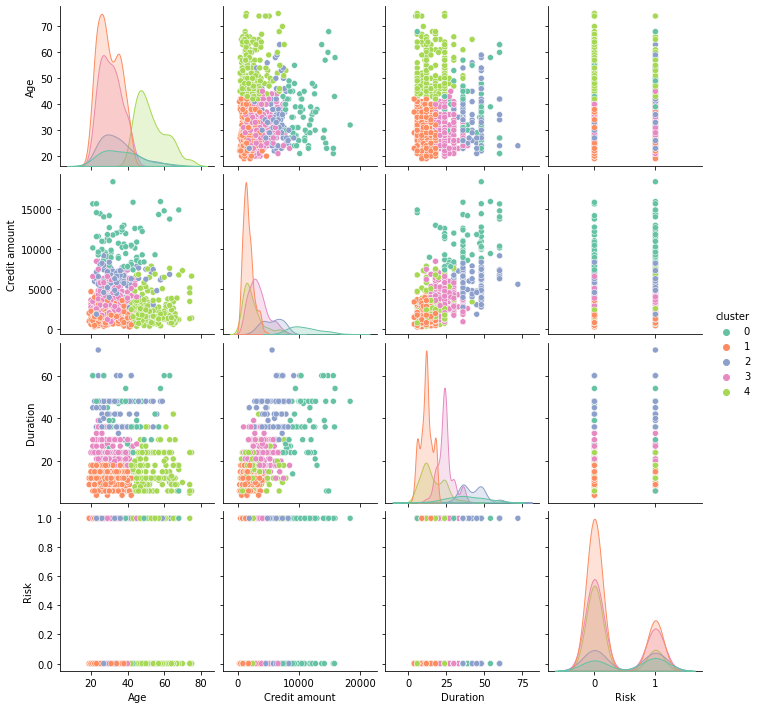


Métricas:
--> Homogeneidade: 0.0379
--> Complitude: 0.0159
--> V_score: 0.0224


Estatísticas por Cluster:
           Age  Credit amount  Duration  Risk
cluster                                      
0        36.94       11093.31     37.49  0.55
1        29.76        1642.96     11.83  0.25
2        34.52        5655.03     42.74  0.47
3        30.74        3282.73     24.24  0.32
4        52.85        2332.62     15.87  0.20


In [25]:
n_clusters = 5
run_analysis (data.copy(), x.copy(), y.copy(), n_clusters)

<br>No quadro abaixo, a análise foi feita a partir dos gráficos gerados e dos atributos Credit Amount, Duration e Age.
<br>Nesse caso, ao aumentarmos o número de clusters de 3 para 5, uma separação ainda foi possível, porém as características que diferenciam um grupo do alto começam a não ficar tão claras.
<br>Ex.: A medida do Credit Amount na label 5.4 (originada da label 3.1) está com um valor intermediário entre as labels 5.1 e 5.3 (originadas da label 3.0)

<table>
    <tr>
        <td colspan="4" style="text-align: center">n_clusters = 3</td>
        <td colspan="4" style="text-align: center">n_clusters = 5</td>
    </tr>
    <tr>
        <td>Label</td>
        <td>Possível descrição</td>
        <td>Distribuição (%)</td>
        <td>Possível segregação quando n_clusters = 5</td>
        <td>Label</td>
        <td>Possível descrição</td>
        <td>Distribuição (%)</td>
    </tr>
    <tr>
        <td rowspan="2" style="text-align: center">0</td>
        <td rowspan="2">baixo credit amount, menos tempo, mais jovens</td>
        <td rowspan="2" style="text-align: center">59</td>
        <td rowspan="2">segregado nos labels 1 e 3</td>
        <td style="text-align: center">1</td>
        <td>baixíssimo credit amount, menos tempo, mais jovens</td>
        <td style="text-align: center">36</td>
    </tr>
    <tr>
        <td style="text-align: center">3</td>
        <td>baixo credit amount, menos tempo, mais jovens</td>
        <td style="text-align: center">27</td>
    </tr>
    <tr>
        <td style="text-align: center">1</td>
        <td>baixo credit amount, menos tempo, mais velhos</td>
        <td style="text-align: center">22</td>
        <td>segregado no label 4</td>
        <td style="text-align: center">4</td>
        <td>baixo credit amount, menos tempo, mais velhos</td>
        <td style="text-align: center">20</td>
    </tr>
    <tr>
        <td rowspan="2" style="text-align: center">2</td>
        <td rowspan="2">alto credit amount, mais tempo</td>
        <td rowspan="2" style="text-align: center">19</td>
        <td rowspan="2">segregado nos labels 0 e 2</td>
        <td style="text-align: center">0</td>
        <td>altíssimo credit amount, mais tempo, porém menor que o grupo 2</td>
        <td style="text-align: center">7</td>
    </tr>
    <tr>
        <td style="text-align: center">2</td>
        <td>alto credit amount, mais tempo</td>
        <td style="text-align: center">10</td>
    </tr>

</table>

### 6 - Análise das métricas

Considerando que todas as métricas variam entre 0 e 1, percebemos que todos os valores estão muito baixos.
<br>Ainda assim, se fizermos uma comparação, veremos que a homogeinidade foi progressivamente aumentando e a complitude caiu ou ficou estável.
<br>O V_score caiu quando variou o n_clusters de 2 para 3, mas voltou praticamente ao mesmo valor quando n_clusters igual a 5.
<br>Analisando-se as métricas, portanto, o desempenho da simulação com n_cluster = 5 se saiu melhor do que com n_cluster = 2.
<br>Supondo-se uma situação real, no entanto, seria necessário um auxílio da equipe de negócios para poder verificar se cada label faz sentido dentro do negócio da empresa e se são realmente úteis.